https://www.notion.so/Backtest-pnl-on-events-Low-skew-CB-Pivot-ATH-88eec344ef2743cebeba7136839e7169?pvs=4

In [6]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from Scenarios import *

In [7]:
# Example usage
# Generate a sample DataFrame with placeholder data
df = pd.DataFrame({
    'Date': pd.date_range(start='2023-01-01', periods=100, freq='D'),
    'IV_OTM_Put': np.random.uniform(low=0.15, high=0.3, size=100),
    'IV_ATM': np.random.uniform(low=0.1, high=0.25, size=100),
    'IV_OTM_Call': np.random.uniform(low=0.15, high=0.3, size=100)
})
# Calculate the skew for all periods
df_with_skew = calculate_simple_skew(df)

### Skew Levels

- Determine periods when the volatility skew was below the:
    - specified abolsute level: skew_threshold
    - skewness levels: 
        - percentile_level: 
        - mean_skew: 
        - std_dev_skew:
        - std_dev_level

In [8]:
# Define your skew threshold
skew_threshold = 0.2

In [9]:
# Filter for periods where skew is below the threshold
low_skew_periods = filter_for_low_skew_periods(df_with_skew, skew_threshold)
low_skew_periods.round(4).head()

,Date,IV_OTM_Put,IV_ATM,IV_OTM_Call,Skew
1,2023-01-02,0.2023,0.1880,0.2486,-0.2462
2,2023-01-03,0.1738,0.1411,0.2085,-0.2461
3,2023-01-04,0.2101,0.2441,0.2663,-0.2300
4,2023-01-05,0.2487,0.2090,0.2984,-0.2377
5,2023-01-06,0.1670,0.2114,0.2392,-0.3416


In [10]:
# Calculate the skewness levels based on the percentile and st dev threshold
skewness_levels = calculate_skewness_levels(df, 'IV_OTM_Put', 'IV_OTM_Call', 'IV_ATM')
skewness_levels

{'percentile_level': -0.026665815950413892,
 'mean_skew': 0.05055844657163045,
 'std_dev_level': -0.005598866334162261}

In [11]:
# Calculates upskew, downskew, and overall skew
spread_threshold = 0.05
ratio_threshold = 1.5

df_skews = calculate_skew(df, 'IV_OTM_Put', 'IV_OTM_Call', 'IV_ATM')
# Determination of spread and ratio between downskew and upskew.
df_ratio = calculate_spreads_and_ratios(df_skews)
# Identification of periods where the spread or ratio exceeds certain thresholds.
threshold_periods = find_threshold_periods(df, spread_threshold, ratio_threshold)
# Calculation of average and median implied volatility shifts for various time intervals after threshold conditions are met.
vol_shifts = calculate_vol_shifts(df, threshold_periods, [1, 3, 6, 9, 12])

/Users/aureliedubost/XEU4/Scenarios.py:151: RuntimeWarning: Mean of empty slice
  results[shift] = {'average': np.nanmean(vol_shifts), 'median': np.nanmedian(vol_shifts)}
/Users/aureliedubost/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [12]:
df_ratio

,Date,IV_OTM_Put,IV_ATM,IV_OTM_Call,Skew,UpSkew,DownSkew,Spread,Ratio
0,2023-01-01,0.295408,0.163684,0.257140,0.233794,0.093456,-0.131724,-0.225180,0.399735
1,2023-01-02,0.202330,0.188030,0.248627,-0.246223,0.060597,-0.014300,-0.074897,-0.246106
2,2023-01-03,0.173775,0.141061,0.208494,-0.246129,0.067434,-0.032714,-0.100148,-0.273976
3,2023-01-04,0.210117,0.244150,0.266265,-0.229975,0.022115,0.034033,0.011918,-0.096164
4,2023-01-05,0.248723,0.208974,0.298386,-0.237651,0.089412,-0.039749,-0.129161,-0.376232
...,...,...,...,...,...,...,...,...,...
95,2023-04-06,0.296676,0.123354,0.271238,0.206225,0.147884,-0.173323,-0.321207,0.717103
96,2023-04-07,0.150500,0.212762,0.170827,-0.095537,-0.041935,0.062261,0.104196,0.438937
97,2023-04-08,0.277394,0.223852,0.271043,0.028374,0.047190,-0.053542,-0.100732,1.663144
98,2023-04-09,0.254246,0.108508,0.220999,0.306400,0.112491,-0.145738,-0.258229,0.367137


In [13]:
threshold_periods

,Date,IV_OTM_Put,IV_ATM,IV_OTM_Call,Skew,UpSkew,DownSkew,Spread,Ratio
8,2023-01-09,0.188214,0.249490,0.240040,-0.207725,-0.009450,0.061275,0.070725,0.045493
20,2023-01-21,0.179055,0.236553,0.161218,0.075404,-0.075335,0.057498,0.132833,-0.999083
23,2023-01-24,0.198139,0.211229,0.162283,0.169752,-0.048946,0.013090,0.062036,-0.288338
24,2023-01-25,0.169353,0.238083,0.209311,-0.167830,-0.028772,0.068730,0.097502,0.171437
28,2023-01-29,0.196318,0.139122,0.192871,0.024774,0.053748,-0.057195,-0.110944,2.169540
37,2023-02-07,0.253466,0.145091,0.246475,0.048182,0.101384,-0.108375,-0.209758,2.104198
43,2023-02-13,0.157467,0.184448,0.158334,-0.004700,-0.026114,0.026981,0.053095,5.555851
45,2023-02-15,0.152950,0.229855,0.186069,-0.144088,-0.043785,0.076904,0.120690,0.303878
52,2023-02-22,0.161630,0.217956,0.188359,-0.122633,-0.029597,0.056326,0.085923,0.241348
53,2023-02-23,0.182606,0.224320,0.176885,0.025506,-0.047435,0.041713,0.089149,-1.859735


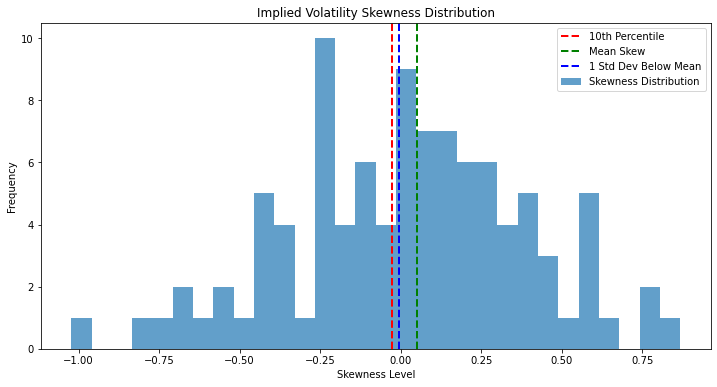

KeyError: 'std_dev_skew'

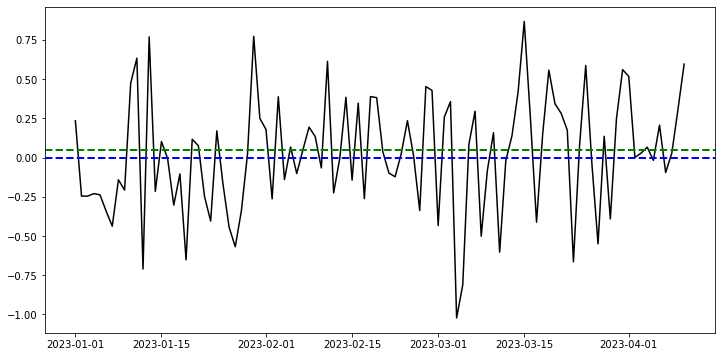

In [14]:
# Plot the skewness distribution and the calculated levels
plt.figure(figsize=(12, 6))
plt.hist(df['Skew'], bins=30, alpha=0.7, label='Skewness Distribution')
plt.axvline(skewness_levels['percentile_level'], color='red', linestyle='dashed', linewidth=2, label='10th Percentile')
plt.axvline(skewness_levels['mean_skew'], color='green', linestyle='dashed', linewidth=2, label='Mean Skew')
plt.axvline(skewness_levels['std_dev_level'], color='blue', linestyle='dashed', linewidth=2, label='1 Std Dev Below Mean')
plt.title('Implied Volatility Skewness Distribution')
plt.xlabel('Skewness Level')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Plot the skewness evolution over time with the mean and standard deviation lines
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Skew'], label='Daily Skew', color='black')
plt.axhline(skewness_levels['mean_skew'], color='green', linestyle='dashed', linewidth=2, label='Mean Skew')
plt.axhline(skewness_levels['std_dev_level'], color='blue', linestyle='dashed', linewidth=2, label='1 Std Dev Below Mean')
plt.fill_between(df['Date'], skewness_levels['mean_skew'] - skewness_levels['std_dev_skew'], 
                 skewness_levels['mean_skew'] + skewness_levels['std_dev_skew'], color='blue', alpha=0.1, label='1 Std Dev Range')
plt.title('Skewness Evolution Over Time')
plt.xlabel('Date')
plt.ylabel('Skewness Level')
plt.legend()
plt.show()

# Plotting the evolution of skewness
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['UpSkew'], label='Upskew', color='blue')
plt.plot(df['Date'], df['DownSkew'], label='DownSkew', color='red')
plt.title('Skewness Evolution Over Time')
plt.xlabel('Date')
plt.ylabel('Skewness Level')
plt.legend()
plt.show()

print(vol_shifts)

### 2. Identify periods

#### Filter for Skew Levels

    Calculates skewness levels based on percentile and standard deviation.
    Categorizes periods into high, low, and average skew based on these levels.
    Filters and displays the periods for each skew category.
    The thresholds for high and low skew are set using the mean skew plus standard deviation level and the specific percentile level, respectively. This approach provides a nuanced view of market sentiment over time, classified into distinct skew categories.

In [15]:
# Calculate skewness levels and categorize periods
skew_levels = calculate_skewness_levels(df, 'IV_OTM_Put', 'IV_OTM_Call', 'IV_ATM')
df = categorize_skew_periods(df, skew_levels)

# Filter for specific skew categories (e.g., High, Low, Average)
high_skew_periods = df[df['Skew_Category'] == 'High']
low_skew_periods = df[df['Skew_Category'] == 'Low']
average_skew_periods = df[df['Skew_Category'] == 'Average']

# Displaying the first few rows of each category
print("High Skew Periods:\n", high_skew_periods.head())
print("Low Skew Periods:\n", low_skew_periods.head())
print("Average Skew Periods:\n", average_skew_periods.head())

High Skew Periods:
          Date  IV_OTM_Put    IV_ATM  IV_OTM_Call      Skew    UpSkew  \
0  2023-01-01    0.295408  0.163684     0.257140  0.112590  0.093456   
2  2023-01-03    0.173775  0.141061     0.208494  0.050074  0.067434   
4  2023-01-05    0.248723  0.208974     0.298386  0.064580  0.089412   
9  2023-01-10    0.264731  0.137917     0.199215  0.094056  0.061298   
11 2023-01-12    0.152758  0.165099     0.270074  0.046318  0.104976   

    DownSkew    Spread     Ratio Skew_Category  
0  -0.131724 -0.225180  0.399735          High  
2  -0.032714 -0.100148 -0.273976          High  
4  -0.039749 -0.129161 -0.376232          High  
9  -0.126814 -0.188112  0.129039          High  
11  0.012341 -0.092635 -0.147732          High  
Low Skew Periods:
          Date  IV_OTM_Put    IV_ATM  IV_OTM_Call      Skew    UpSkew  \
8  2023-01-09    0.188214  0.249490     0.240040 -0.035363 -0.009450   
20 2023-01-21    0.179055  0.236553     0.161218 -0.066417 -0.075335   
23 2023-01-24    0

### 3. Selecting strikes based on delta and moneyness 

- Delta-based strategies: select the strike prices of OTM put and call options that have deltas closest to the specified values (e.g., a 16 delta for a 1 standard deviation strangle). 
- Moneyness-based strategies: select strike prices at a specified distance from the current price of the underlying. This could be a percentage or a dollar amount which reflects a particular confidence interval or expected range of movement.

Delta: How much premium is expected to move per one unit move in the underlying asset. 

A 16 delta option, for example, would theoretically have a 16% chance of expiring in-the-money.

Moneyness: How far they are from the current price of the underlying asset, typically expressed as a percentage. 

A call strike that is 5% above the current price and a put strike that is 5% below the current price.

In [16]:
select_moneyness_based_strikes(current_price, percentage_above, percentage_below)

NameError: name 'current_price' is not defined

In [ ]:
select_moneyness_based_strikes(current_price, percentage_above, percentage_below)

In practice, you would need access to a real-time or historical options chain data source that includes delta values for each option. You would then use these functions to iterate over the option chain for each period you're analyzing to select the appropriate strike prices for your strangle strategy.

Remember that these are simplified examples. The actual implementation would need to account for the availability of specific strike prices, bid-ask spreads, and possibly adjusting the target deltas based on liquidity or other market factors

### O. SET UP

In [17]:
# Placeholder data for option chains and underlying asset prices
# In practice, you would have historical data for these
option_chain = pd.DataFrame({
    'Type': ['call', 'put'],
    'Strike': [110, 90],  # Example strikes
    'Delta': [0.16, -0.16],  # Example deltas
    'Price': [2, 2],  # Example prices
    'Expiration': ['2024-01-30', '2024-01-30']  # Example expiration dates
})

underlying_data = pd.DataFrame({
    'Date': pd.date_range(start='2024-01-01', periods=30, freq='D'),
    'Price': np.linspace(100, 110, 30)  # Example underlying prices
})

# Placeholder for skew data
underlying_data['Skew'] = np.random.normal(0, 1, size=30)  # Random skew values

# Define parameters for the strategy
target_delta = 0.16
percentage_above = 10
percentage_below = 10
skew_threshold = 0.2  # Define your skew threshold
transaction_costs = 1  # Define your average transaction costs per trade

### 4. Simulate Strangle Positions
    - For each qualifying period, simulate the purchase of a put and a call with the selected deltas or moneyness levels. Ensure the options have the same expiration date.
    - Record the premiums paid for both legs of the strangle

In [19]:
trade_structure_example = [{'Type': 'call', 'Position': 'long', 'Delta': 0.5},
 {'Type': 'put', 'Position': 'short', 'Delta': -0.5}]
trade_structure_example

[{'Type': 'call', 'Position': 'long', 'Delta': 0.5},
 {'Type': 'put', 'Position': 'short', 'Delta': -0.5}]

In [20]:
# Sample input data
option_chain = pd.DataFrame({
    'Strike': [90, 95, 100, 105, 110],
    'Type': ['put', 'put', 'call', 'call', 'call'],
    'Delta': [-0.2, -0.15, 0.15, 0.2, 0.25],
    'Premium': [1.2, 0.8, 0.7, 1.1, 1.5]
})

In [23]:
# 4. Simulate Custom Trade # MAIN #
custom_trade_result = simulate_custom_trade_structure(option_chain, trade_structure_example, current_price)
custom_trade_result

{'Trade Details': [], 'Total Cost/Premium': 0}

In [25]:
current_price = 100  # Current price of the underlying asset
target_delta = 0.15  # Target delta for the strategy
moneyness_percentage = 10  # Percentage for moneyness-based strategy

In [26]:
target_delta = 0.15  # Target delta for the strategy
moneyness_percentage = 10  # Percentage for moneyness-based strategy

# Specific strike choices (None if you want to use delta or moneyness calculations)
specific_call_strike = 105
specific_put_strike = 95

In [27]:
# Simulate strangle positions
strangle_positions = simulate_strangle_positions(option_chain, target_delta, moneyness_percentage, current_price)
strangle_positions

NameError: name 'simulate_strangle_positions' is not defined

In [28]:
strangle_positions = simulate_strangle_positions(option_chain)
strangle_positions

NameError: name 'simulate_strangle_positions' is not defined

In [29]:
# Allow specific strike selection for both delta-based and moneyness-based strategies.

# Sample input data
option_chain = pd.DataFrame({
    'Strike': [90, 95, 100, 105, 110],
    'Type': ['put', 'put', 'call', 'call', 'call'],
    'Delta': [-0.2, -0.15, 0.15, 0.2, 0.25],
    'Premium': [1.2, 0.8, 0.7, 1.1, 1.5]
})
current_price = 100  # Current price of the underlying asset

### 5. Track and Manage Positions
    - Track the daily price movements of legs positions.
    - Help design a data-driven decision making for the positions—whether you to hold it until expiration, set profit targets, or stop-loss levels, or make adjustments based on changes in the underlying or the passage of time.

In [30]:
#calculate_pnl(strangle_positions, call_prices, put_prices)

In [31]:
track_and_manage_positions(strangle_positions, underlying_prices)

NameError: name 'strangle_positions' is not defined

### 6. Calculate PnL

This function, simulate_market_greeks_pnl, generates a hypothetical range of dates and underlying asset prices. It then calculates the Greeks for each day using the Black-Scholes model and estimates the PnL based on those Greeks. The PnL calculation here is simplified and intended as a placeholder; in practice, you would need to incorporate a more complex PnL calculation that considers the actual trading strategy and market conditions.

    - At the end of each period or upon closing the position, calculate the PnL for each leg and for the total portfolio. 
    - Add daily greeks position and pnl attribution,
    - Retrieve a df with the dates, spot performance, leg performance, greeks pnl and position for each legs
    
Tracks and attributes PnL to the Greeks, providing insights into how the option positions contribute to the overall performance of the trade structure. The daily Theta decay is considered, along with the impact of Delta on PnL due to changes in the underlying asset's price.

Please note, in a real-world scenario, you would incorporate more Greeks such as Gamma, Vega, and Rho, and you would likely use a more sophisticated model for calculating these sensitivities. Additionally, you'd apply more complex risk management strategies and consider various market regimes as part of your trading decision-making process.

#### Function to Simulate Market Data and Calculate Greeks

In [32]:
import pandas as pd
import numpy as np
from scipy.stats import norm



# Simulate market data over a range of dates and calculate the Greeks for each day.
# This function generates a DataFrame with the Greeks for every trading day in the simulation period.
def simulate_market_greeks(start_date, end_date, start_price, end_price, strikes, r, sigma, num_points):
    """
    Simulate market data and calculate Greeks over a date range.

    Parameters:
    - start_date: The start date of the simulation period
    - end_date: The end date of the simulation period
    - start_price: The starting price of the underlying asset
    - end_price: The ending price of the underlying asset
    - strikes: A list of strike prices to simulate
    - r: Risk-free interest rate
    - sigma: Volatility of the underlying asset
    - num_points: Number of data points to simulate

    Returns:
    A DataFrame with calculated Greeks for each strike and option type at each simulated market date.
    """
    # Create a date range for the simulation period
    dates = pd.date_range(start=start_date, periods=num_points, freq='D')
    # Generate a linear space of stock prices from start_price to end_price
    prices = np.linspace(start_price, end_price, num_points)
    
    # Initialize a DataFrame to store the Greeks over the simulation period
    greeks_df = pd.DataFrame(index=dates)
    
    # Loop through each date and stock price
    for date, price in zip(dates, prices):
        # Calculate time to expiry as a fraction of a year
        T = (end_date - date).days / 365
        # Loop through each strike price and option type to calculate Greeks
        for strike in strikes:
            for option_type in ['call', 'put']:
                # Get Greeks for the current option
                greeks = black_scholes_greeks(option_type, price, strike, T, r, sigma)
                # Store each Greek in the DataFrame with appropriate labeling
                for greek, value in greeks.items():
                    greeks_df.loc[date, f'Leg {strike} {option_type} {greek}'] = value
                    
    return greeks_df

#

# Example usage of the functions
start_date = '2023-01-01'
end_date = '2023-12-31'
start_price = 100
end

NameError: name 'end' is not defined

In [33]:
import pandas as pd
import numpy as np
from scipy.stats import norm

# Function to calculate Black-Scholes Greeks for an option.
def black_scholes_greeks(option_type, S, K, T, r, sigma):
    """
    Calculate the Black-Scholes Greeks for a given option.

    Parameters:
    - option_type: 'call' or 'put'
    - S: Current stock price
    - K: Option strike price
    - T: Time to expiration in years
    - r: Risk-free rate
    - sigma: Volatility of the underlying asset

    Returns:
    A dictionary containing Greeks: delta, gamma, theta, vega, rho.
    """
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if option_type == 'call':
        delta = norm.cdf(d1)
        gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
        theta = -S * sigma * norm.pdf(d1) / (2 * np.sqrt(T)) - r * K * np.exp(-r * T) * norm.cdf(d2)
        vega = S * norm.pdf(d1) * np.sqrt(T)
        rho = K * T * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        delta = -norm.cdf(-d1)
        gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
        theta = -S * sigma * norm.pdf(d1) / (2 * np.sqrt(T)) + r * K * np.exp(-r * T) * norm.cdf(-d2)
        vega = S * norm.pdf(d1) * np.sqrt(T)
        rho = -K * T * np.exp(-r * T) * norm.cdf(-d2)
    else:
        raise ValueError("Option type must be 'call' or 'put'.")
    
    return {
        'delta': delta, 
        'gamma': gamma, 
        'theta': theta, 
        'vega': vega, 
        'rho': rho
    }

# Function to define a multi-leg options trade structure.
def create_trade_structure(legs):
    """
    Define a trade structure for a multi-leg options strategy.

    Parameters:
    - legs: A list of dictionaries with each leg's details (type, strike, position, quantity)

    Returns:
    A list of dictionaries representing the trade structure.
    """
    return legs

# Function to simulate the market and calculate Greeks for each leg of the trade.
def simulate_market_and_calculate_greeks(trade_structure, market_conditions):
    """
    Simulate market conditions and calculate Greeks for each leg of the trade.

    Parameters:
    - trade_structure: List of dictionaries defining the trade structure
    - market_conditions: Dictionary with current market conditions (S, T, r, sigma)

    Returns:
    A DataFrame with calculated Greeks for each leg of the trade.
    """
    # Create a DataFrame to hold the results
    results = pd.DataFrame()
    
    # Calculate Greeks for each leg
    for leg in trade_structure:
        leg_greeks = black_scholes_greeks(
            leg['type'], 
            market_conditions['S'], 
            leg['strike'], 
            market_conditions['T'], 
            market_conditions['r'], 
            market_conditions['sigma']
        )
        for greek, value in leg_greeks.items():
            # Multiply by quantity and take into account the position (long/short)
            position_multiplier = 1 if leg['position'] == 'long' else -1
            results[f"Leg {leg['type']} {leg['strike']} {greek}"] = value * leg['quantity'] * position_multiplier
    
    return results

# Function to calculate the PnL for the trade based on the Greeks.
def calculate_pnl_from_greeks(greeks_df, price_movement):
    """
    Calculate the PnL for the trade based on the Greeks and price movement.

    Parameters:
    - greeks_df: DataFrame containing Greeks for each leg of the trade
    - price_movement: The price movement of the underlying asset

    Returns:
    A DataFrame with the PnL for each leg of the trade.
    """
    # Initialize a DataFrame to hold PnL results
    pnl_df = pd.DataFrame(index=greeks_df.index)
    
    # Calculate PnL for each leg based on the Greeks and price movement
    for column in greeks_df.columns:
        if 'delta' in column:
            # PnL from delta is the change in price times the delta
            pnl_df[column.replace('delta', 'PnL')] = greeks_df[column] * price_movement
    
    # Sum up PnL for all legs to get the total PnL
    pnl_df['Total PnL'] = pnl_df.sum(axis=1)
    
    return pnl_df

# Example of usage:
# Define the trade structure
trade_structure = create_trade_structure([
    {'type': 'call', 'strike': 100, 'position': 'long', 'quantity': 1},
    {'type': 'put', 'strike': 100, 'position': 'short', 'quantity': 1},
    # Add more legs as required
])

# Define market conditions
market_conditions = {
    'S': 100,  # Current price of the underlying asset
    'T': 1/12, # Time to expiration in years (1 month)
    'r': 0.01, # Risk-free rate
    'sigma': 0.2 # Volatility of the underlying asset
}

# Simulate the market and calculate Greeks
greeks_df = simulate_market_and_calculate_greeks(trade_structure, market_conditions)

# Assume a hypothetical price movement
price_movement = 5  # The underlying asset moves by $5

# Calculate PnL from Greeks
pnl_df = calculate_pnl_from_greeks(greeks_df, price_movement)

# Print the last few rows of the DataFrame to see the results
print(pnl_df.tail())


Empty DataFrame
Columns: [Leg call 100 PnL, Leg put 100 PnL, Total PnL]
Index: []


In [36]:
import pandas as pd
import numpy as np
from scipy.stats import norm

# Function to calculate Black-Scholes Greeks for an option.
def black_scholes_greeks(option_type, S, K, T, r, sigma):
    """
    Calculate the Black-Scholes Greeks for a given option.

    Parameters:
    - option_type: 'call' or 'put'
    - S: Current stock price
    - K: Option strike price
    - T: Time to expiration in years
    - r: Risk-free rate
    - sigma: Volatility of the underlying asset

    Returns:
    A dictionary containing Greeks: delta, gamma, theta, vega, rho.
    """
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if option_type == 'call':
        delta = norm.cdf(d1)
        gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
        theta = -S * sigma * norm.pdf(d1) / (2 * np.sqrt(T)) - r * K * np.exp(-r * T) * norm.cdf(d2)
        vega = S * norm.pdf(d1) * np.sqrt(T)
        rho = K * T * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        delta = -norm.cdf(-d1)
        gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
        theta = -S * sigma * norm.pdf(d1) / (2 * np.sqrt(T)) + r * K * np.exp(-r * T) * norm.cdf(-d2)
        vega = S * norm.pdf(d1) * np.sqrt(T)
        rho = -K * T * np.exp(-r * T) * norm.cdf(-d2)
    else:
        raise ValueError("Option type must be 'call' or 'put'.")
    
    return {
        'delta': delta, 
        'gamma': gamma, 
        'theta': theta, 
        'vega': vega, 
        'rho': rho
    }

# Function to simulate market data for a week
def simulate_weekly_market_data(start_price, volatility, r, T):
    """
    Simulate market data for a week.

    Parameters:
    - start_price: Starting price of the underlying asset at the beginning of the week
    - volatility: Expected volatility of the underlying asset
    - r: Risk-free interest rate
    - T: Time to expiration in years

    Returns:
    A DataFrame with simulated daily spot prices for a week.
    """
    # Generate daily returns using a normal distribution and apply them to the start_price
    daily_returns = np.random.normal(0, volatility / np.sqrt(252), 7)
    price_path = start_price * np.cumprod(1 + daily_returns)
    
    # Create a DataFrame with the simulated spot prices
    dates = pd.date_range(start=pd.Timestamp.today(), periods=7, freq='D')
    weekly_market_data = pd.DataFrame(data=price_path, columns=['Spot'], index=dates)
    
    return weekly_market_data

# Simulate market data for a week with a starting price of $100 and volatility of 20%
weekly_market_data = simulate_weekly_market_data(100, 0.2, 0.01, 1/52)

# Example trade structure: long strangle
trade_structure = [
    {'type': 'call', 'strike': 102, 'position': 'long', 'quantity': 1},
    {'type': 'put', 'strike': 98, 'position': 'long', 'quantity': 1}
]

# Calculate Greeks and PnL for each day of the week
for index, row in weekly_market_data.iterrows():
    T_remaining = (pd.Timestamp('2023-12-31') - index).days / 365  # Time to expiry
    for leg in trade_structure:
        leg_greeks = black_scholes_greeks(leg['type'], row['Spot'], leg['strike'], T_remaining, 0.01, 0.2)
        # Assuming the PnL calculation involves delta only for this example
        pnl = leg_greeks['delta'] * (row['Spot'] - leg['strike'])
        weekly_market_data.at[index, f"{leg['type']} {leg['strike']} PnL"] = pnl * leg['quantity']

# Add a column to sum the PnL for the strangle strategy
weekly_market_data['Total Strangle PnL'] = weekly_market_data.filter(like='PnL').sum(axis=1)

print(weekly_market_data)

                                  Spot  call 102 PnL  put 98 PnL  \
2024-01-01 18:48:47.619280   98.553210           NaN         NaN   
2024-01-02 18:48:47.619280   99.710418           NaN         NaN   
2024-01-03 18:48:47.619280   99.677290           NaN         NaN   
2024-01-04 18:48:47.619280  103.045646           NaN         NaN   
2024-01-05 18:48:47.619280  103.345726           NaN         NaN   
2024-01-06 18:48:47.619280  102.007678           NaN         NaN   
2024-01-07 18:48:47.619280  101.478710           NaN         NaN   

                            Total Strangle PnL  
2024-01-01 18:48:47.619280                 0.0  
2024-01-02 18:48:47.619280                 0.0  
2024-01-03 18:48:47.619280                 0.0  
2024-01-04 18:48:47.619280                 0.0  
2024-01-05 18:48:47.619280                 0.0  
2024-01-06 18:48:47.619280                 0.0  
2024-01-07 18:48:47.619280                 0.0  


<ipython-input-36-10aeca4650e8>:21: RuntimeWarning:

invalid value encountered in sqrt

<ipython-input-36-10aeca4650e8>:22: RuntimeWarning:

invalid value encountered in sqrt

<ipython-input-36-10aeca4650e8>:26: RuntimeWarning:

invalid value encountered in sqrt

<ipython-input-36-10aeca4650e8>:27: RuntimeWarning:

invalid value encountered in sqrt

<ipython-input-36-10aeca4650e8>:28: RuntimeWarning:

invalid value encountered in sqrt

<ipython-input-36-10aeca4650e8>:32: RuntimeWarning:

invalid value encountered in sqrt

<ipython-input-36-10aeca4650e8>:33: RuntimeWarning:

invalid value encountered in sqrt

<ipython-input-36-10aeca4650e8>:34: RuntimeWarning:

invalid value encountered in sqrt



### 7. Backtesting:
    - Backtest the strategy over the historical periods identified. This will provide insights into the profitability and risk characteristics of the strategy under the specified conditions.
    
historical periods identified = skew < 

In [37]:
backtest_strategy(underlying_data, option_chain)

NameError: name 'skew_threshold' is not defined

In [38]:
# Run the backtest
average_pnl = backtest_strategy(underlying_data, option_chain)
print(f"Average PnL from backtesting: {average &#8203;``【oaicite:0】``&#8203;

SyntaxError: EOL while scanning string literal (<ipython-input-38-71b56232258c>, line 3)

8. **Statistical Analysis**:
    - Analyze the distribution of returns from the strategy. Look for metrics such as mean return, median return, standard deviation, maximum drawdown, and Sharpe ratio.
    - Consider the impact of black swan events and how the strategy performs under extreme market conditions.